<Figure size 432x288 with 0 Axes>

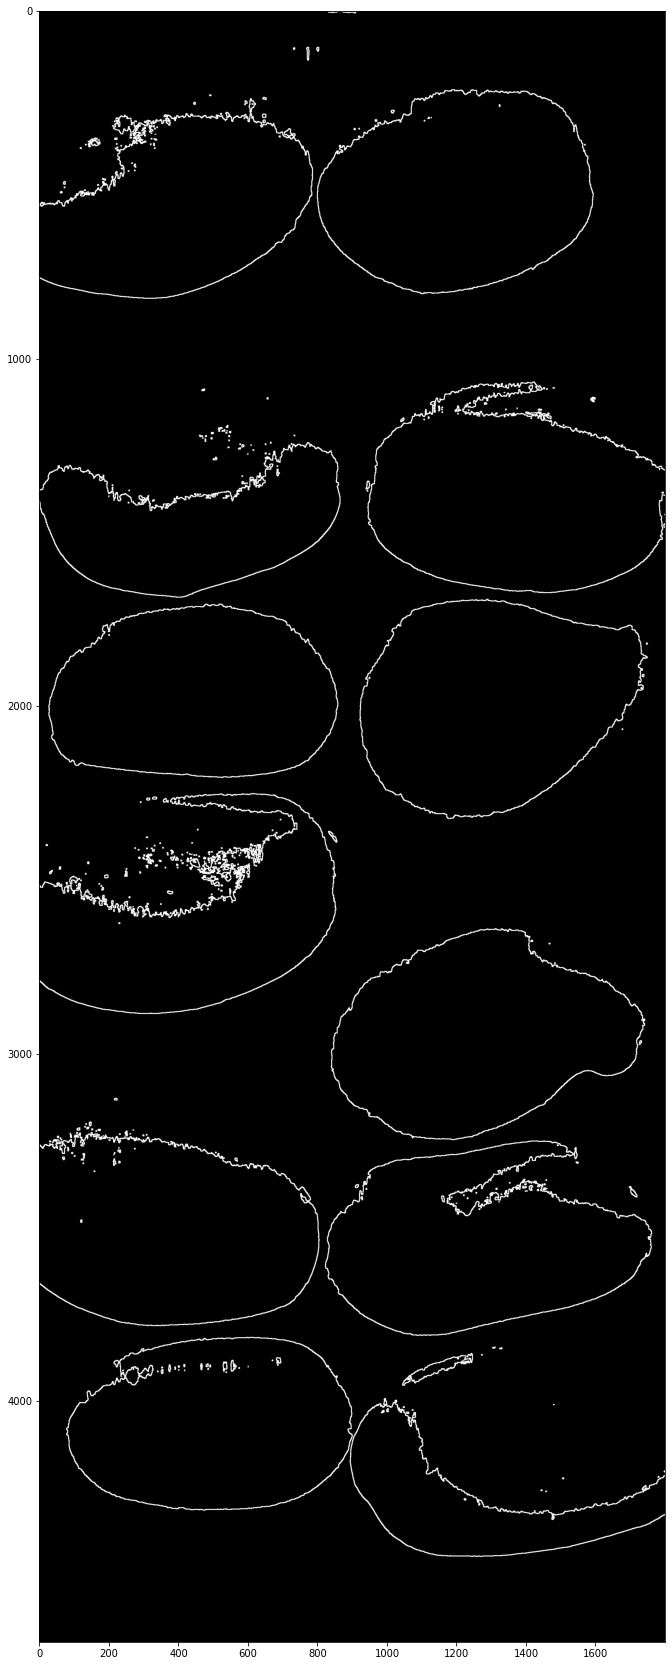

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from plots import plotSpectrum
#from skimage.io import imsave, imread,imshow

#%matplotlib inline
#plt.rcParams['figure.figsize'] = [16, 8]

potatoB1 = sp.open_image("../Normalised/potato_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T153243_raw_rad_nn.hdr")
#potatoPelledB1 = sp.open_image("../Normalised/potatopeeled_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T160546_raw_rad_nn.hdr")
margin = 1200
N,M,bands = potatoB1.shape

potatoB1 = potatoB1[margin:,:,:]
#sp.imshow(potatoB1, figsize = (300,30) ,cmap="gray")
#potatoB1 = potatoB1.read_subimage(np.arange(margin, N, 1),np.arange(0, M, 1))
#sp.imshow(potatoB1, figsize = (300,30) ,cmap="gray")


#N,M,bands = potatoPelledB1.shape
#print(N,M,bands)

#potatoB1_pixel = potatoB1.read_pixel(4100,1200)
#potatoPelledB1_pixel = potatoPelledB1.read_pixel(4100,1200)

#plotSpectrum(potatoB1_pixel)
#plt.figure()
#plotSpectrum(potatoPelledB1_pixel)


potatoB1Band = potatoB1[:,:,170]


#sp.imshow(potatoB1Band, figsize = (300,30) ,cmap="gray")
#plt.figure()

image8bit = (potatoB1Band*256).astype('uint8')

blurred = cv2.GaussianBlur(image8bit, (5, 5), 0)

thresh = cv2.threshold(blurred, np.mean(blurred) , 1, cv2.THRESH_BINARY_INV)[1]  #thresholdblurred[150,900]

kernel = np.ones((3,3),np.uint8)

#edges = cv2.dilate(cv2.Canny(thresh, 0, 1), None)

#dilate = cv2.erode(cv2.dilate(thresh, kernel, iterations=1), kernel, iterations=6)
#sp.imshow(dilate, figsize = (300,30), cmap="gray")
#plt.figure()


#opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)

edges = cv2.dilate(cv2.Canny(thresh, 0, 1), kernel, iterations = 1)


#thresh = cv2.threshold(blurred, , 1, cv2.THRESH_BINARY)[1]
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 13, 2)

sp.imshow(edges, figsize = (300,30), cmap="gray")
plt.figure()



    # Draws contours
#cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)
#cv2.drawContours(image8bit, cnt[-8:], -1, (255), 10)
#sp.imshow(image8bit, figsize = (300,30), cmap="gray")
#plt.figure()




#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()





#kernel = np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 5)

#sp.imshow(closing, figsize = (300,30), cmap="gray")



#laplacian = cv2.Laplacian(potatoB1Band,cv2.CV_8U,ksize=9)
#plt.imshow(laplacian, figsize = (300,30) ,cmap="gray")
#plt.figure()





129


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

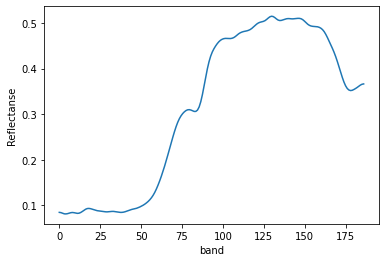

<Figure size 432x288 with 0 Axes>

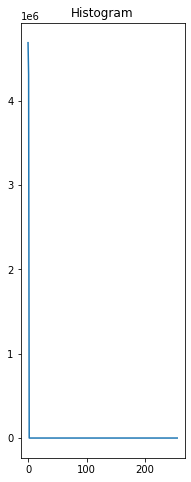

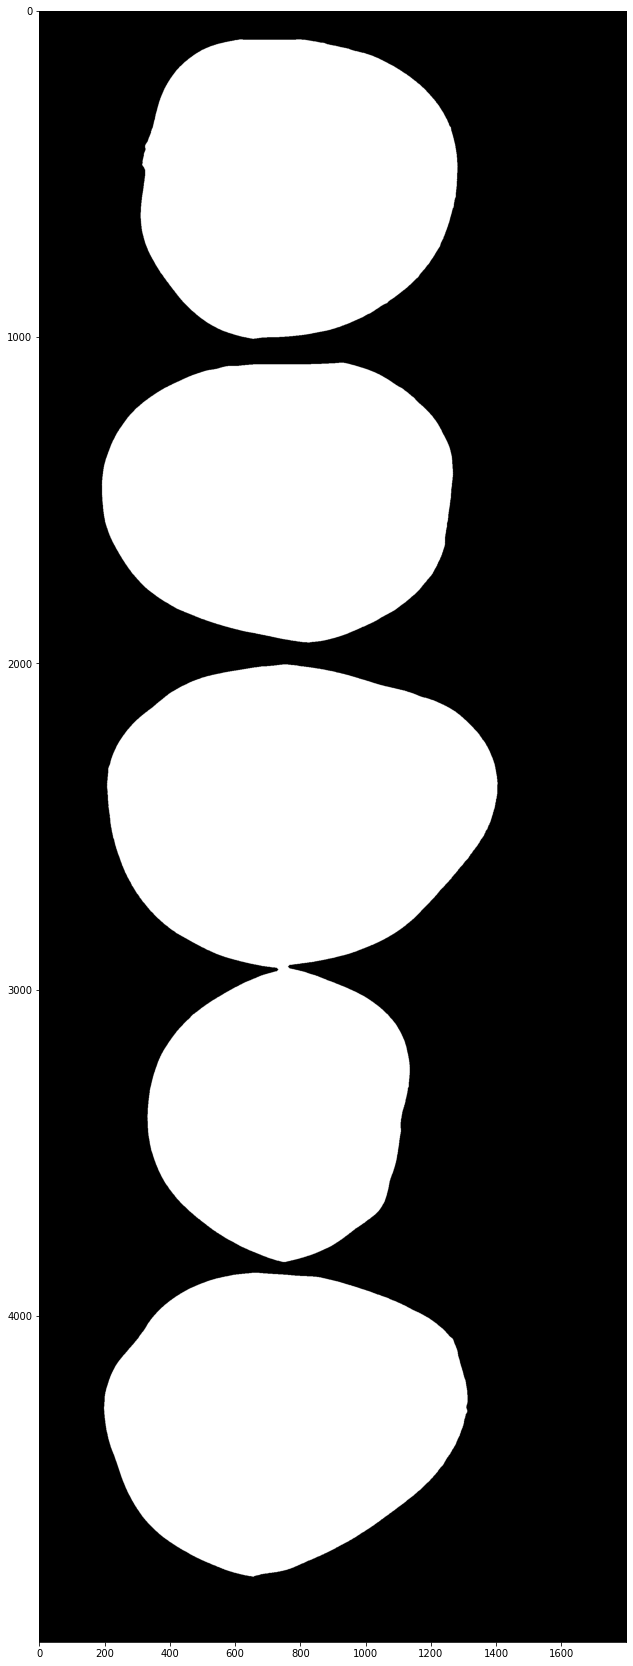

<Figure size 432x288 with 0 Axes>

In [106]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from plots import plotSpectrum

#threshold = np.mean(imgBig8bit)
threshold = 7

def imhist(im):
    n, m = im.shape
    h = [0.0] * 256
    for i in range(n):
        for j in range(m):
            h[im[i, j]]+=1
    return np.array(h)

imgBig = sp.open_image("../Normalised/potatobig_b2_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T165853_raw_rad_nn.hdr")

marginMin = 1100
marginMax = marginMin + 5000#1050
N,M,bands = imgBig.shape

imgBig = imgBig[marginMin:marginMax,:,:]

imgBig_pixel = imgBig[550, 900]

plotSpectrum(imgBig_pixel, xaxis='band')
plt.figure()


imgBigBand = imgBig[:,:,126]


#sp.imshow(imgBigBand, figsize = (300,30) ,cmap="gray")
#plt.figure()

imgBig8bit = (imgBigBand*256).astype('uint8')
imgBig8bitBinary = (imgBig8bit > threshold)
imgBigBool = np.zeros(imgBig8bit.shape, dtype='bool')
imgBigBool = (imgBig8bit > threshold)
print(imgBig8bit[550, 900])


blurred = cv2.GaussianBlur(imgBig8bit, (3, 3), 0)

thresh = cv2.threshold(blurred, np.mean(blurred) , 255, cv2.THRESH_BINARY)[1]  #thresholdblurred[150,900]
#thresh = cv2.threshold(blurred, 0, 1, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(blurred, 1, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 13, 2)


threshHist = imhist(imgBigBool)

plt.figure(figsize=(10, 8))
ax=plt.subplot(131)
ax.set_title("Histogram")
ax.plot(threshHist)

#sp.imshow(imgBigBool, figsize = (300,30), cmap="gray")
#plt.figure()
#sp.imshow(imgBig, figsize = (300,30) ,cmap="gray")

kernel = np.ones((3,3),np.uint8)
kernel[0,0] = 0
kernel[0,2] = 0
kernel[2,0] = 0
kernel[2,2] = 0

#kernel_flat = np.ones((3,3), np.uint8)
#kernel_flat[0, 0:] = 0
#kernel_flat[2, 0:] = 0


imgBigBool = np.float32(imgBigBool)
dilate = cv2.dilate(imgBigBool, kernel, iterations=5)
opening = cv2.erode(dilate, kernel, iterations=5)
opening = cv2.erode(opening, kernel_flat, iterations=75)
sp.imshow(opening, figsize = (300,30), cmap="gray")
plt.figure()


#opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)

#edges = cv2.dilate(cv2.Canny(thresh, 0, 1), kernel, iterations = 1)


#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()



    # Draws contours
#cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)
#cv2.drawContours(imgBig8bit, cnt[-8:], -1, (255), 10)
#sp.imshow(imgBig8bit, figsize = (300,30), cmap="gray")
#plt.figure()




#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()

#kernel = np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 5)

#sp.imshow(closing, figsize = (300,30), cmap="gray")



#laplacian = cv2.Laplacian(imgBigBand,cv2.CV_8U,ksize=9)
#plt.imshow(laplacian, figsize = (300,30) ,cmap="gray")
#plt.figure()